<a href="https://colab.research.google.com/github/BintangPray/MPDW_Peramalann/blob/main/GARCH%20BARU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

# Impor Data

In [8]:
data = pd.read_excel("MPDW.xlsx")
lambda_bc = -0.7575758
data['Boxcox'] = data['Harga']**lambda_bc
data['Diff'] = np.diff(data['Boxcox'], prepend=data['Boxcox'][0])

In [9]:
data['Diff'] = data['Diff']/100
data['DiffA'] = data['Diff']*100
print(data.head())
print(data.shape)

     Tanggal  Harga    Boxcox          Diff     DiffA
0 2022-09-01  62070  0.000234  0.000000e+00  0.000000
1 2022-09-02  57760  0.000247  1.310619e-07  0.000013
2 2022-09-03  59920  0.000240 -6.775429e-08 -0.000007
3 2022-09-04  59450  0.000242  1.437422e-08  0.000001
4 2022-09-05  61310  0.000236 -5.574941e-08 -0.000006
(700, 5)


In [10]:
print(data.tail())

       Tanggal  Harga    Boxcox          Diff     DiffA
695 2024-07-27  75460  0.000202  1.267706e-07  0.000013
696 2024-07-28  69540  0.000215  1.288014e-07  0.000013
697 2024-07-29  79400  0.000194 -2.051008e-07 -0.000021
698 2024-07-30  84850  0.000185 -9.520199e-08 -0.000010
699 2024-07-31  78630  0.000196  1.095843e-07  0.000011


# Splitting Data

_Splitting_ data dilakukan dengan membagi data menjadi data latih sebanyak 578 amatan dan data uji sebanyak 122 amatan.

Jumlah data latih: 578
Jumlah data uji: 122


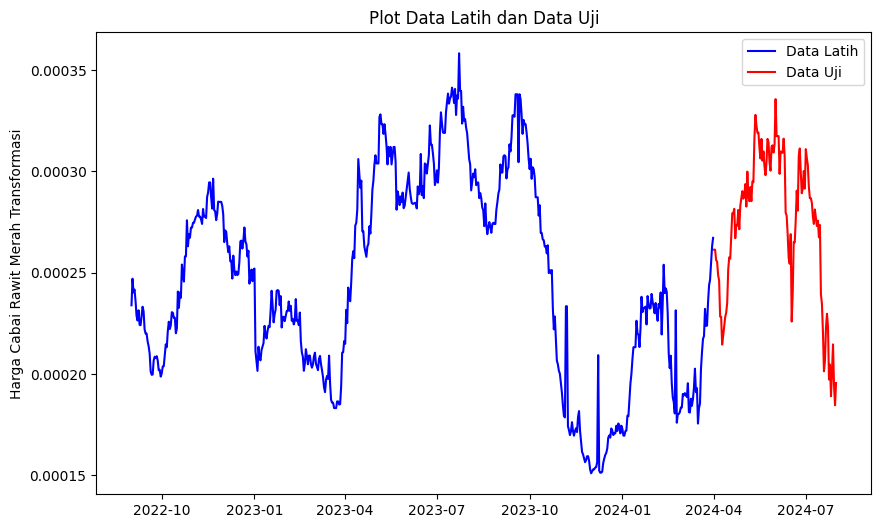

In [11]:
test_size = 122
train_data = data.iloc[:-test_size]
test_data = data.iloc[-test_size:]

# Menampilkan jumlah data dalam setiap bagian untuk memastikan pemisahan yang benar
print("Jumlah data latih:", len(train_data))
print("Jumlah data uji:", len(test_data))
# Membuat plot data latih dan data uji
plt.figure(figsize=(10, 6))
plt.plot(train_data['Tanggal'], train_data['Boxcox'], label='Data Latih', color='blue')
plt.plot(test_data['Tanggal'], test_data['Boxcox'], label='Data Uji', color='red')
plt.title('Plot Data Latih dan Data Uji')
plt.ylabel('Harga Cabai Rawit Merah Transformasi')
plt.legend()
plt.show()

Jumlah data latih: 578
Jumlah data uji: 122


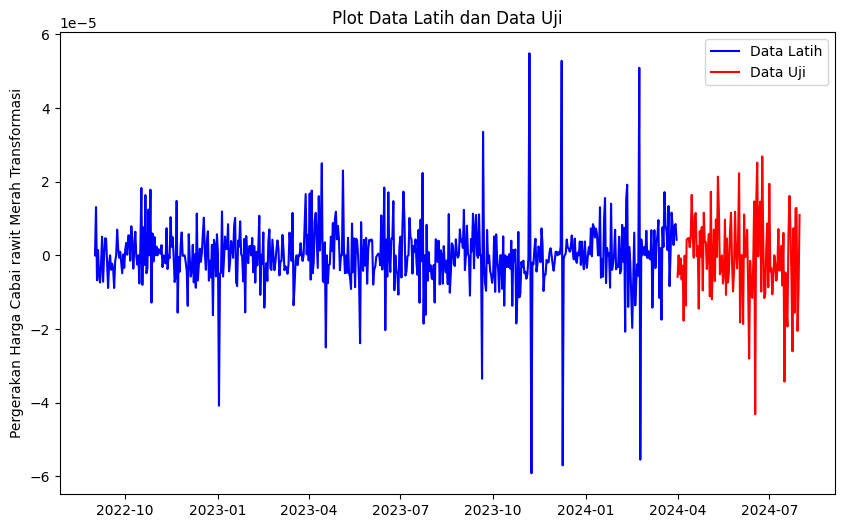

In [12]:
print("Jumlah data latih:", len(train_data))
print("Jumlah data uji:", len(test_data))
# Membuat plot data latih dan data uji
plt.figure(figsize=(10, 6))
plt.plot(train_data['Tanggal'], train_data['DiffA'], label='Data Latih', color='blue')
plt.plot(test_data['Tanggal'], test_data['DiffA'], label='Data Uji', color='red')
plt.title('Plot Data Latih dan Data Uji')
plt.ylabel('Pergerakan Harga Cabai rawit Merah Transformasi')
plt.legend()
plt.show()

In [13]:
data_diff = data['Diff'][1:]
train_data_diff = data_diff.iloc[:-test_size]
test_data_diff = data_diff.iloc[-test_size:]

print(train_data_diff.head())
print(train_data_diff.shape)

print(test_data_diff.head())
print(test_data_diff.shape)

1    1.310619e-07
2   -6.775429e-08
3    1.437422e-08
4   -5.574941e-08
5   -7.394159e-08
Name: Diff, dtype: float64
(577,)
578   -5.833265e-08
579    0.000000e+00
580   -5.123694e-08
581   -8.430920e-09
582   -6.553211e-08
Name: Diff, dtype: float64
(122,)


# Pemodelan GARCH

### Pendugaan Parameter

GARCH(1,1)

In [14]:
# Load your time series data (e.g., 'train_data_partial')
# Specify the GARCH(1, 1) model
model_garch11_diff = arch_model(train_data_diff, vol='GARCH', mean = 'constant', p=1, q=1)

# Fit the model
result_garch11_diff = model_garch11_diff.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: -8568.853167008681
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -8568.853167164456
            Iterations: 1
            Function evaluations: 5
            Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.441e-15. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1e+07 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [15]:
# Display model fitting summary
print(result_garch11_diff.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   Diff   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8568.85
Distribution:                  Normal   AIC:                          -17129.7
Method:            Maximum Likelihood   BIC:                          -17112.3
                                        No. Observations:                  577
Date:                Sun, Oct 27 2024   Df Residuals:                      576
Time:                        08:36:44   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         5.7637e-10  2.455e-09      0.235      0.814 

GARCH(1,2)

In [16]:
# Load your time series data (e.g., 'train_data_partial')
# Specify the GARCH(1, 2) model
model_garch12_diff = arch_model(train_data_diff, vol='GARCH', mean = 'constant', p=1, q=2)

# Fit the model
result_garch12_diff = model_garch12_diff.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -8565.59858815762
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -8565.59858853646
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.441e-15. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1e+07 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [17]:
# Display model fitting summary
print(result_garch12_diff.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   Diff   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8565.60
Distribution:                  Normal   AIC:                          -17121.2
Method:            Maximum Likelihood   BIC:                          -17099.4
                                        No. Observations:                  577
Date:                Sun, Oct 27 2024   Df Residuals:                      576
Time:                        08:37:41   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         5.7637e-10  2.481e-09      0.232      0.816 

GARCH(2,1)

In [18]:
# Load your time series data (e.g., 'train_data_partial')
# Specify the GARCH(2, 1) model
model_garch21_diff = arch_model(train_data_diff, vol='GARCH', mean = 'constant', p=2, q=1)

# Fit the model
result_garch21_diff = model_garch21_diff.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -8566.428540342555
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -8566.428540700272
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.441e-15. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1e+07 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [19]:
# Display model fitting summary
print(result_garch21_diff.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   Diff   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8566.43
Distribution:                  Normal   AIC:                          -17122.9
Method:            Maximum Likelihood   BIC:                          -17101.1
                                        No. Observations:                  577
Date:                Sun, Oct 27 2024   Df Residuals:                      576
Time:                        08:38:13   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         5.7637e-10  2.413e-09      0.239      0.811 

GARCH(2,2)

In [20]:
# Load your time series data (e.g., 'train_data_partial')
# Specify the GARCH(2, 2) model
model_garch22_diff = arch_model(train_data_diff, vol='GARCH', mean = 'constant', p=2, q=2)

# Fit the model
result_garch22_diff = model_garch22_diff.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: -8565.82918379877
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -8565.82918425888
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.441e-15. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1e+07 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [21]:
# Display model fitting summary
print(result_garch22_diff.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   Diff   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8565.83
Distribution:                  Normal   AIC:                          -17119.7
Method:            Maximum Likelihood   BIC:                          -17093.5
                                        No. Observations:                  577
Date:                Sun, Oct 27 2024   Df Residuals:                      576
Time:                        08:38:42   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         5.7637e-10  2.398e-09      0.240      0.810 

Model GARCH(1,1) dipilih sebagai model tentatif terbaik karena memiliki parameter alpha dan beta yang signifikan

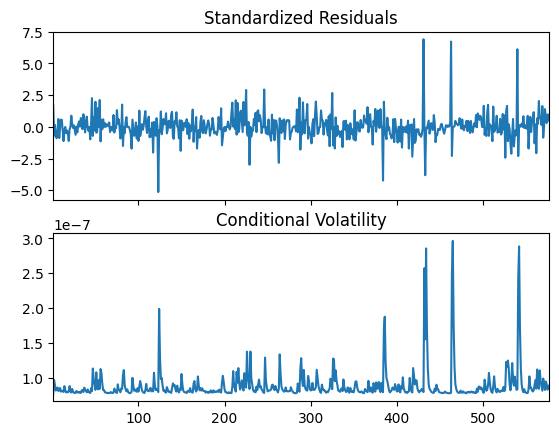

In [22]:
fig = result_garch11_diff.plot()

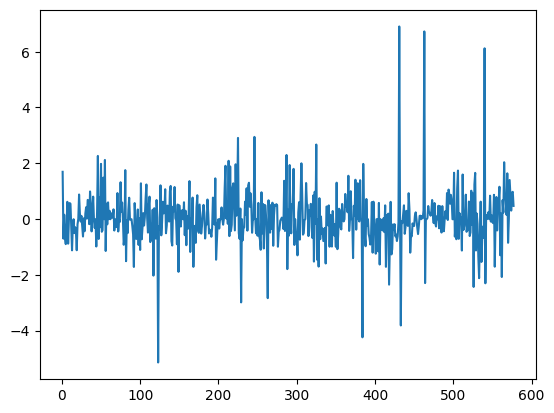

In [23]:
garch_stresidual = result_garch11_diff.resid / result_garch11_diff.conditional_volatility
plt.plot(garch_stresidual)

### Diagnostik Sisaan: Uji Kebebasan Sisaan (Ljung-Box)

$H_0$: Sisaan saling bebas

$H_1$: Sisaan tidak saling bebas

In [24]:
import statsmodels.api as sm
result_df = sm.stats.acorr_ljungbox(abs(garch_stresidual), lags=[10], return_df=True)
print(result_df)

     lb_stat  lb_pvalue
10  4.808991   0.903567


### Diagnostik Sisaan: Uji Normalitas Sisaan (Kolmogorov-Smirnov)

$H_0$: Sisaan menyebar normal

$H_1$: Sisaan tidak menyebar normal

In [25]:
from scipy import stats
result_norm = stats.kstest(garch_stresidual, 'norm')
print(result_norm.pvalue)

9.21581395922458e-06


### Diagnostik Sisaan: Uji Nilai Harapan Sisaan (t-test)

$H_0$: Nilai harapan sisaan nol

$H_1$: Nilai harapan sisaan tidak nol

In [26]:
result_harapan = stats.ttest_1samp(garch_stresidual, 0)
print(result_harapan.pvalue)

0.5283787692218844


In [27]:
from google.colab import files

garch_stresidual.to_excel("garch_stresidual_fix.xlsx", index=False)
files.download("garch_stresidual_fix.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Prediksi

Pendugaan nilai amatan menggunakan model GARCH(1,1) dilakukan pada data latih dan uji untuk menghitung nilai keakuratan model.

In [28]:
np.random.seed(42)
epsilon_train = np.random.normal(0, 1, 577)

### Prediksi pada Data Latih

In [29]:
predicted_train = result_garch11_diff.conditional_volatility * epsilon_train + 5.7637e-10
predicted_train

,cond_vol
1,3.885819e-08
2,-1.283442e-08
3,5.842310e-08
4,1.247913e-07
5,-1.880412e-08
...,...
573,3.144721e-08
574,-1.931562e-08
575,6.919068e-08
576,-1.910673e-07


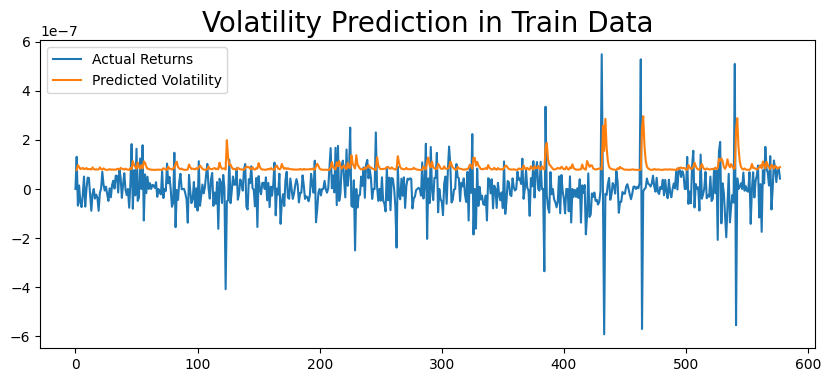

In [30]:
plt.figure(figsize=(10,4))
true, = plt.plot(train_data['Diff'])
preds, = plt.plot(result_garch11_diff.conditional_volatility)
plt.title('Volatility Prediction in Train Data', fontsize=20)
plt.legend(['Actual Returns', 'Predicted Volatility'], fontsize=10)

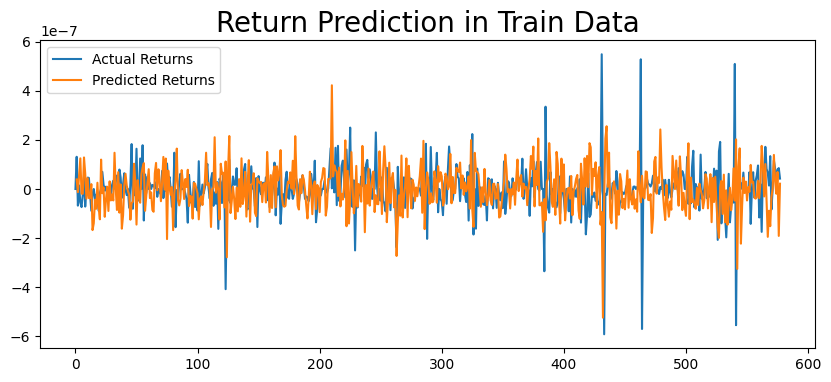

In [31]:
plt.figure(figsize=(10,4))
true, = plt.plot(train_data['Diff'])
preds, = plt.plot(predicted_train)
plt.title('Return Prediction in Train Data', fontsize=20)
plt.legend(['Actual Returns', 'Predicted Returns'], fontsize=10)

In [32]:
from google.colab import files

predicted_train.to_excel("predicted_train_fix.xlsx", index=False)
files.download("predicted_train_fix.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Prediksi pada Data Uji

In [33]:
condvar_test = []

for i in range(test_size):
    train = data_diff[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    condvar_test.append(np.sqrt(pred.variance.values[-1,:][0]))

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.441e-15. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1e+07 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.433e-15. Parameter
estimation work better when this value is between 1 and 1000. The recom

In [34]:
condvar_test

[8.330688230342915e-08,
 8.3600365735549e-08,
 7.938902061063013e-08,
 8.139735338805804e-08,
 7.87200094257334e-08,
 8.316375764710613e-08,
 8.010774931851889e-08,
 1.1147143430620686e-07,
 8.901857018847776e-08,
 1.0145853164838548e-07,
 8.753848214938429e-08,
 8.307777811605758e-08,
 8.189511606774796e-08,
 7.93213198336745e-08,
 8.073599238055895e-08,
 1.0735241462941981e-07,
 9.159865969812492e-08,
 8.190396277603954e-08,
 9.223099467283753e-08,
 9.675796742278906e-08,
 8.361712740635517e-08,
 7.992008489788978e-08,
 0.021675896048621704,
 9.014524382645085e-08,
 8.13397622677677e-08,
 8.555784831613246e-08,
 9.061943005537197e-08,
 9.631882996340387e-08,
 8.490465696394982e-08,
 8.110170395865727e-08,
 8.014390571958921e-08,
 7.820775548519739e-08,
 8.142046240121382e-08,
 9.301421038059374e-08,
 1.1252672459567611e-07,
 1.042430477939347e-07,
 8.705585683486893e-08,
 8.5966861955142e-08,
 8.591290148609162e-08,
 9.07804094148949e-08,
 8.146014258855875e-08,
 1.2329273579795407e-

In [36]:
condvar_test = pd.Series(condvar_test, index=data_diff.index[-122:])
print(condvar_test)

578    8.330688e-08
579    8.360037e-08
580    7.938902e-08
581    8.139735e-08
582    7.872001e-08
           ...     
695    1.138380e-07
696    1.082726e-07
697    1.069906e-07
698    1.282061e-07
699    1.064650e-07
Length: 122, dtype: float64


In [37]:
np.random.seed(42)
epsilon_test = np.random.normal(0, 1, 122)

In [38]:
predicted_test = condvar_test * epsilon_test + 5.7637e-10
predicted_test

,0
578,4.195608e-08
579,-1.098258e-08
580,5.199573e-08
581,1.245470e-07
582,-1.785619e-08
...,...
695,-1.324636e-07
696,1.243127e-07
697,8.102612e-08
698,1.019915e-07


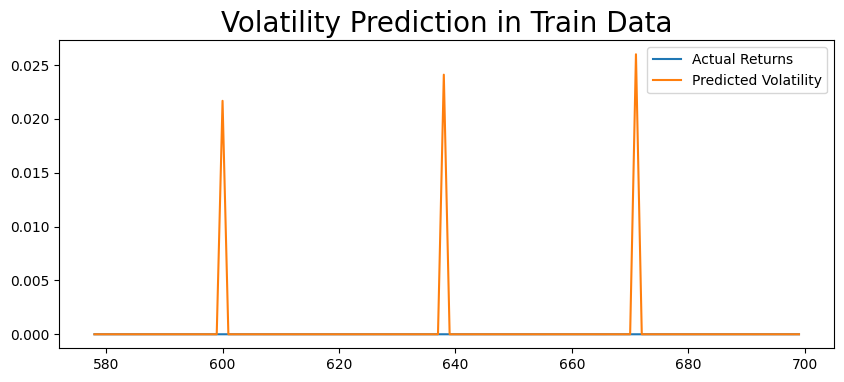

In [39]:
plt.figure(figsize=(10,4))
true, = plt.plot(test_data['Diff'])
preds, = plt.plot(condvar_test)
plt.title('Volatility Prediction in Train Data', fontsize=20)
plt.legend(['Actual Returns', 'Predicted Volatility'], fontsize=10)

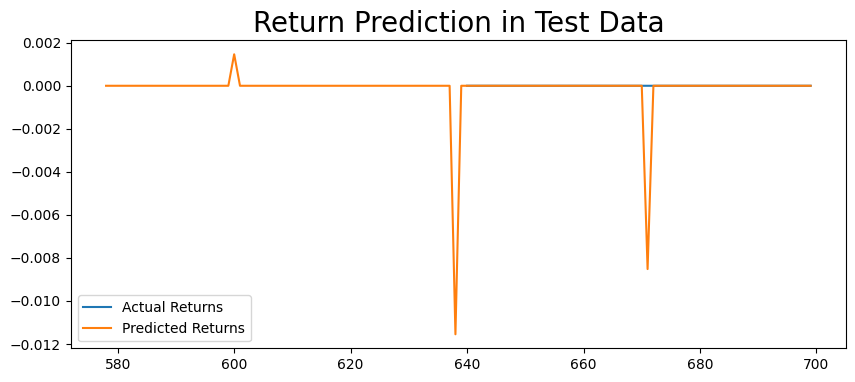

In [40]:
plt.figure(figsize=(10,4))
true, = plt.plot(data_diff[-60:])
preds, = plt.plot(predicted_test)
plt.title('Return Prediction in Test Data', fontsize=20)
plt.legend(['Actual Returns', 'Predicted Returns'], fontsize=10)

In [41]:
from google.colab import files

predicted_test.to_excel("predicted_test_fix.xlsx", index=False)
files.download("predicted_test_fix.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TRANSFORMASI BALIK

In [58]:
pt_1 = data['Harga'][577]
hasil_prediksi_inv_boxcox = np.r_[pt_1, predicted_test].cumsum()

In [66]:
pt = data['Harga'][0]
hasil_prediksi = np.r_[pt, predicted_train].cumsum()

In [69]:
from google.colab import files

# Ubah hasil_prediksi dan hasil_prediksi_inv_boxcox menjadi DataFrame
df_prediksi_train = pd.DataFrame(hasil_prediksi, columns=['Prediksi_Train'])
df_prediksi_test = pd.DataFrame(hasil_prediksi_inv_boxcox, columns=['Prediksi_Test'])

# Simpan ke file Excel
df_prediksi_train.to_excel("prediksi_train.xlsx", index=False)
files.download("prediksi_train.xlsx")

df_prediksi_test.to_excel("prediksi_test.xlsx", index=False)
files.download("prediksi_test.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [67]:
print(hasil_prediksi)

[62070.         62070.00000004 62070.00000003 62070.00000008
 62070.00000021 62070.00000019 62070.00000017 62070.0000003
 62070.00000036 62070.00000032 62070.00000037 62070.00000033
 62070.00000029 62070.00000031 62070.00000015 62070.00000001
 62069.99999996 62069.99999988 62069.99999991 62069.99999983
 62069.99999971 62069.99999983 62069.99999981 62069.99999982
 62069.99999971 62069.99999966 62069.99999967 62069.99999958
 62069.99999962 62069.99999957 62069.99999955 62069.9999995
 62069.99999965 62069.99999965 62069.99999956 62069.99999963
 62069.99999953 62069.99999955 62069.99999939 62069.99999928
 62069.9999993  62069.99999936 62069.99999937 62069.99999937
 62069.99999934 62069.99999922 62069.99999916 62069.99999911
 62069.99999921 62069.99999924 62069.9999991  62069.99999913
 62069.9999991  62069.99999904 62069.9999991  62069.99999919
 62069.9999993  62069.99999921 62069.99999918 62069.99999921
 62069.99999929 62069.99999925 62069.99999924 62069.99999915
 62069.99999906 62069.9999

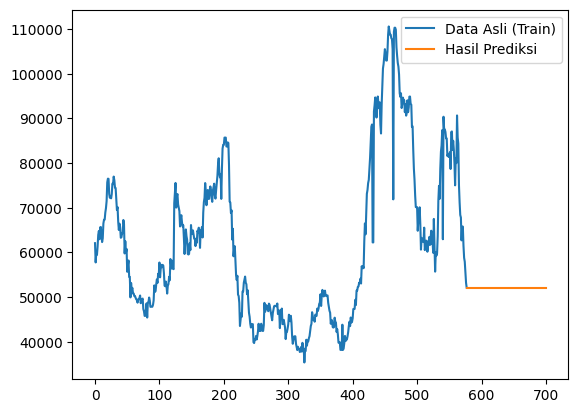

In [62]:
plt.plot(train_data['Harga'], label='Data Asli (Train)')
plt.plot(range(578, 578 + len(hasil_prediksi_inv_boxcox)), hasil_prediksi_inv_boxcox, label='Hasil Prediksi')
plt.legend()
plt.show()

In [65]:
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Hitung MAPE
mape_value = calculate_mape(test_data['Harga'], hasil_prediksi_inv_boxcox[-1])
print(f'MAPE: {mape_value:.2f}%')

MAPE: 15.34%


# Peramalan

Peramalan (_forecasting_) terhadap data dilakukan hingga 120 periode ke depan.

In [ ]:
from datetime import datetime, timedelta

data_diff.index = pd.to_datetime(data_diff.index)

pred = result_garch11_diff.forecast(horizon=120)
future_dates = [data_diff.index[-1] + timedelta(days=i) for i in range(1,121)]
condvar_forecast = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 120 Days')

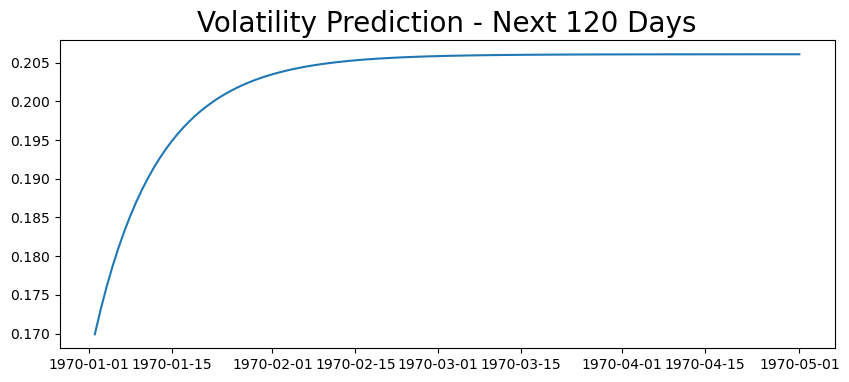

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(condvar_forecast)
plt.title('Volatility Prediction - Next 120 Days', fontsize=20)

In [ ]:
np.random.seed(42)
epsilon_forecast = np.random.normal(0, 1, 120)

In [ ]:
predicted_forecast = condvar_forecast * epsilon_forecast - 0.0159
predicted_forecast

1970-01-02 00:00:00.000000973    0.068499
1970-01-03 00:00:00.000000973   -0.039840
1970-01-04 00:00:00.000000973    0.098137
1970-01-05 00:00:00.000000973    0.256273
1970-01-06 00:00:00.000000973   -0.058304
                                   ...   
1970-04-27 00:00:00.000000973    0.046243
1970-04-28 00:00:00.000000973   -0.023053
1970-04-29 00:00:00.000000973   -0.256742
1970-04-30 00:00:00.000000973    0.219614
1970-05-01 00:00:00.000000973    0.139059
Length: 120, dtype: float64

Text(0.5, 1.0, 'Return Forecast - Next 30 Days')

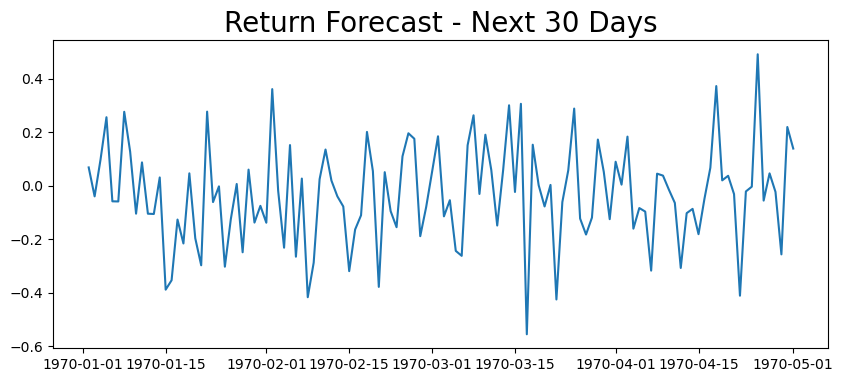

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(predicted_forecast)
plt.title('Return Forecast - Next 30 Days', fontsize=20)

In [ ]:
predicted_forecast.to_excel("D:/IPB/Skripsi/Data/Prediksi GARCH/forecasted_return_120_10^6.xlsx", index=False)